In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from matplotlib.legend_handler import HandlerPatch
from scipy.ndimage import rotate

plt.style.use('seaborn-v0_8')
plt.rcParams.update({
    'font.size': 24,
    'axes.titlesize': 16,     # Font size for titles
    'axes.labelsize': 16,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 12     # Font size for legend
})

# Function to create a plot for each track
def create_plot(data_files, image_for_overlay, labels, colors, title, step_range, end_markers):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Variables to store the last points for each trajectory
    last_points = []

    for file_path, color, label in zip(data_files, colors, labels):
        # Load the numpy file
        pos_data = np.load(file_path)

        # Extract the x and y coordinates
        x_values = pos_data[1:, 0, 0, 0]
        y_values = pos_data[1:, 0, 0, 1]

        _step_range = step_range[label]
        x = x_values[_step_range[0]:_step_range[1]]
        y = y_values[_step_range[0]:_step_range[1]]


        # x = x_values[step_range[0]:step_range[1]]
        # y = y_values[step_range[0]:step_range[1]]

        # x = x_values[:500]
        # y = y_values[:500]

        # if label == 'CNN':
        #     x = x_values[60:560]
        #     y = y_values[60:560]

        # Plot the (x, y) data
        ax.plot(x, y, color, alpha=0.8, label=label)

        # Store the last point
        # last_points.append((x[-1], y[-1], color, label))
        # Store the last point
        if end_markers[label]:
            last_points.append((x[-1], y[-1], color, label))

    # Plot the 'X' markers at the last (x, y) values
    for x, y, color, label in last_points:
        ax.scatter(x, y, color=color, marker='X', s=100, zorder=5)
    
    # Plot a black 'X' marker for the legend
    ax.scatter([], [], color='k', marker='X', s=100, label='Collision')

    # Add the image overlay
    img = mpimg.imread(image_for_overlay)
    img = rotate(img, -90)
    img_height, img_width = img.shape[:2]

    # Calculate the aspect ratio
    aspect_ratio = img_width / img_height

    # Define the extent of the image overlay based on the aspect ratio and scale
    scale_x = 8.15
    scale_y = scale_x / aspect_ratio 
    image_extent = [-scale_x, scale_x, -scale_y, scale_y]

    ax.imshow(img, extent=image_extent, alpha=1, zorder=0)

    # Add labels and a title
    # ax.set_xlabel(r'$x \, (m)$', fontsize=12)
    # ax.set_ylabel(r'$y \, (m)$', fontsize=12)
    # ax.set_title(title, fontsize=14)

    # Add gridlines for better readability
    ax.grid(True, linestyle='--', linewidth=0.5)

    # Draw a starting zone at (5,5)
    start_x, start_y = 5, 5
    radius = 0.2
    circle = plt.Circle((start_x, start_y), radius, color='r', fill=True, linestyle='-', linewidth=2, label='Starting Zone')
    ax.add_patch(circle)

    # Custom legend handler for the circle
    class HandlerCircle(HandlerPatch):
        def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
            circle = plt.Circle((0.5 * width - xdescent, 0.5 * height - ydescent), 0.2 * width, 
                                facecolor=orig_handle.get_facecolor(), edgecolor=orig_handle.get_edgecolor(),
                                lw=orig_handle.get_linewidth(), linestyle=orig_handle.get_linestyle(), transform=trans)
            return [circle]

    # Create the legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), handler_map={plt.Circle: HandlerCircle()}, fontsize=12)

    # Adjust layout and save the figure
    plt.tight_layout()
    plt.show()

colors = ['#e41a1c', '#4daf4a', '#377eb8']

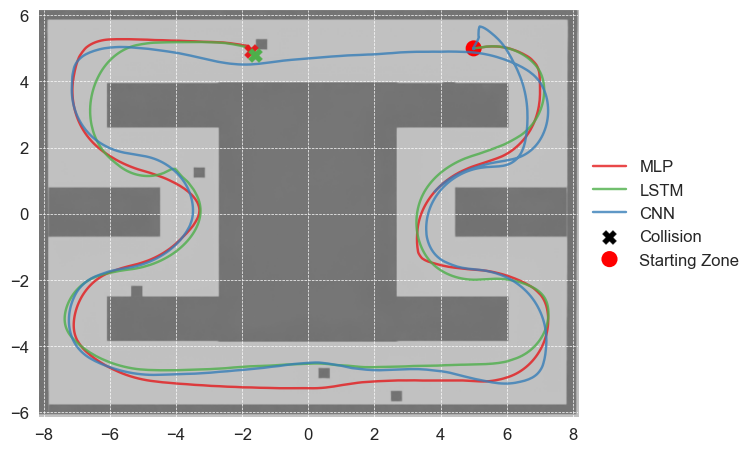

In [3]:
# Plot for Track 1
data_files_1 = ['data/pos_data_MLP_test_track_1_with_fixed_obstacles.npy',
                'data/pos_data_LSTM_test_track_1_with_fixed_obstacles.npy',
                'data/pos_data_CNN_test_track_1_with_fixed_obstacles.npy']


# Dictionary to store the step ranges for each model
step_ranges1 = {
    'MLP': [0, 570],
    'LSTM': [0, 575],
    'CNN': [0, 700]
}

end_markers1 = {
    'MLP': True,
    'LSTM': True,
    'CNN': False
}


create_plot(data_files_1, 'images/test_track_1_obstacles.png', ['MLP', 'LSTM', 'CNN'], colors, 'Test Track 1', step_ranges1, end_markers1)


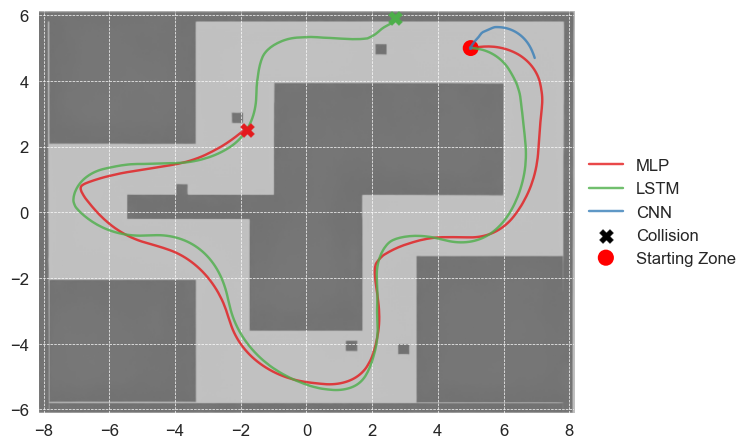

In [4]:
# Plot for Track 2
data_files_2 = ['data/pos_data_MLP_test_track_2_with_fixed_obstacles.npy',
                'data/pos_data_LSTM_test_track_2_with_fixed_obstacles.npy',
                'data/pos_data_CNN_test_track_2_with_fixed_obstacles.npy']


step_ranges2 = {
    'MLP': [0, 365],
    'LSTM': [0, 460],
    'CNN': [0, 70]
}

end_markers2 = {
    'MLP': True,
    'LSTM': True,
    'CNN': False
}


create_plot(data_files_2, 'images/test_track_2_obstacles.png', ['MLP', 'LSTM', 'CNN'], colors, 'Test Track 2', step_ranges2, end_markers2)


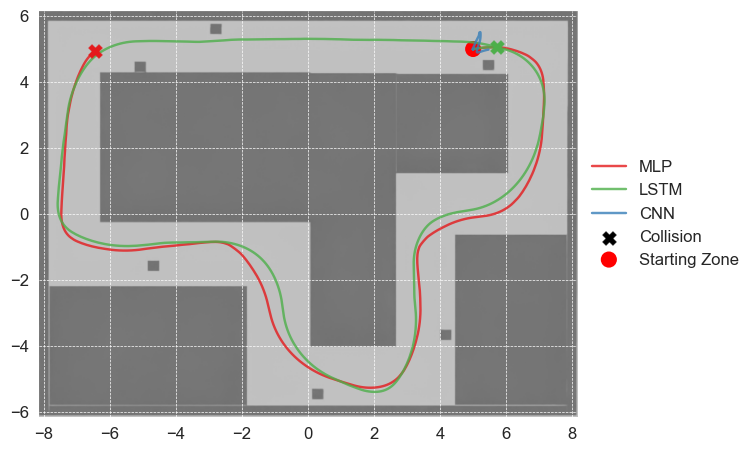

In [5]:
# Plot for Track 3
data_files_3 = ['data/pos_data_MLP_test_track_3_with_fixed_obstacles.npy',
                'data/pos_data_LSTM_test_track_3_with_fixed_obstacles.npy',
                'data/pos_data_CNN_test_track_3_with_fixed_obstacles.npy']


step_ranges2 = {
    'MLP': [0, 365],
    'LSTM': [0, 460],
    'CNN': [0, 70]
}

end_markers2 = {
    'MLP': True,
    'LSTM': True,
    'CNN': False
}

create_plot(data_files_3, 'images/test_track_3_obstacles.png', ['MLP', 'LSTM', 'CNN'], colors, 'Test Track 3', step_ranges2, end_markers2)